In [1]:
#Base
import sys
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import time
import pickle
import datetime as dt
from datetime import datetime
from datetime import date
import json
import requests
import emoji
import re
import string
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn-darkgrid')

# Notebook methodology
In this notebook, the results produced in notebook 2 and 3 were combined to visualise and identify interesting correlations between events, sentiment, user activity and topics.

In [2]:
df = pd.read_csv('../datasets/avlliv_final.csv', converters = {'tokens': eval, 'sentiment_dict':eval})

In [3]:
df.head()

,date,user,is_retweet,is_quote,text,quoted_text,mentions,hashtags,cleantext,lang,tokens,datetime,time,sentiment_dict,sentiment_score,sentiment_rating,dominanttopic
0,4/10/2020 18:10,justincroser,False,False,come on reds!! 🔴🔴 have to sleep for work but h...,NaN,NaN,"['#AVLLIV', '#LFC', '#LFCFamily', '#YNWA']",come on reds have to sleep for work but hoping...,1,"[come, red, sleep, work, hope, win, go, watch,...",2020-10-04 18:10:00,18:10:00,"{'neg': 0.0, 'neu': 0.729, 'pos': 0.271, 'comp...",0.8720,pos,topic_6
1,4/10/2020 18:10,LFCYNWA125,True,False,rt @lfc: jürgen klopp provides detail on the s...,NaN,"['@LFC', '@Alissonbecker']","['#LFC', '#AVLLIV']",username jrgen klopp provides detail on the sh...,1,"[username, detail, shoulder_injury, sideline, ...",2020-10-04 18:10:00,18:10:00,"{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...",-0.4215,neg,topic_5
2,4/10/2020 18:10,itstugenfinest,True,False,rt @skysportspl: 'i'm pretty sure he won't be ...,NaN,['@SkySportsPL'],NaN,username im pretty sure he wont be ready after...,1,"[username, pretty, sure, ready, set, week, sid...",2020-10-04 18:10:00,18:10:00,"{'neg': 0.079, 'neu': 0.714, 'pos': 0.207, 'co...",0.5252,pos,topic_4
3,4/10/2020 18:10,guu_mendees,True,False,rt @ludovicofans: now follow the news l...,NaN,['@ludovicofans'],NaN,username now follow the news live live streami...,1,"[username, follow, news, live, live, streaming...",2020-10-04 18:10:00,18:10:00,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,topic_2
4,4/10/2020 18:10,justindivine5,True,True,rt @anfieldwatch: jurgen klopp: “it’s an inter...,Liverpool face an anxious wait on how long the...,['@AnfieldWatch'],NaN,username jurgen klopp its an international bre...,1,"[username, jurgen, klopp, pretty, sure, ready,...",2020-10-04 18:10:00,18:10:00,"{'neg': 0.074, 'neu': 0.734, 'pos': 0.192, 'co...",0.5252,pos,topic_4


In [3]:
df['datetime']=pd.to_datetime(df['datetime'])

In [4]:
matchmask = (df['datetime'] >= datetime.strptime('2020-10-04 18:15:00','%Y-%m-%d %H:%M:%S')) & (df['datetime'] <= datetime.strptime('2020-10-04 20:09:00','%Y-%m-%d %H:%M:%S'))
    

# Setting labels

In [5]:
# Annotate each of the goals on the xticks
match_x_labels =['', 'Kick Off 0', '', '', '',
       'Watkins Goal 4', '', '', '', '',
       '', '', '', '', '',
       '', '', '', '', '',
       '', '', '', 'Watkins Goal 22', '',
       '', '', '', '', '',
       '', '', '', '', 'Salah Goal 33',
       '', 'McGinn Goal 35', '', '', '',
       'Watkins Goal 39', '', '', '', '',
       '', '', '', '', 'Half Time 45+3',
       '', '', '', '', '',
       '', '', '', '', '',
       '', '', '', '', '',
       '', 'Second Half 45', '', '', '',
       '', '', '', '', '',
       '', 'Barkley 55', '', '', '',
       '', 'Salah Goal 60', '', '', '',
       '', 'Grealish Goal 66', '', '', '',
       '', '', '', '', '',
       '', '', 'Grealish 75', '', '',
       '', '', '', '', '',
       '', '', '', '', '',
       '', '', '', '', 'Full Time 90+3']

In [6]:
# The laughs mask is missing 2 values, so the lables are adjusted accordingly
matchlol_x_labels =['', 'Kick Off 0', '',
       'Watkins Goal 4', '', '', '', '',
       '', '', '', '', '',
       '', '', '', '', '',
       '', '', '', 'Watkins Goal 22', '',
       '', '', '', '', '',
       '', '', '', '', 'Salah Goal 33',
       '', 'McGinn Goal 35', '', '', '',
       'Watkins Goal 39', '', '', '', '',
       '', '', '', '', 'Half Time 45+3',
       '', '', '', '', '',
       '', '', '', '', '',
       '', '', '', '', '',
       '', 'Second Half 45', '', '', '',
       '', '', '', '', '',
       '', 'Barkley 55', '', '', '',
       '', 'Salah Goal 60', '', '', '',
       '', 'Grealish Goal 66', '', '', '',
       '', '', '', '', '',
       '', '', 'Grealish 75', '', '',
       '', '', '', '', '',
       '', '', '', '', '',
       '', '', '', '', 'Full Time 90+3']

# Tweets per minute

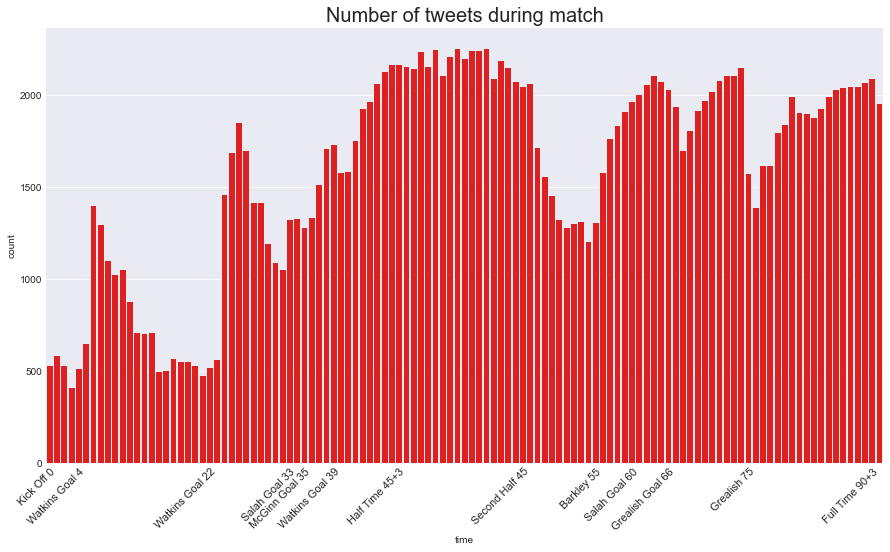

In [8]:
plt.figure(figsize=(15,8))
plt.title('Number of tweets during match',loc='center', fontsize=20)
ax = sns.countplot(x=df[matchmask]['time'], color='red')
ax.set_xticklabels(match_x_labels, rotation = 45, ha='right',fontsize=11)
plt.show()

# Social media term processing

In [8]:
terms = pd.read_csv('../datasets/avlliv_terms.csv')

In [9]:
terms.head()

,datetime,time,tokens
0,2020-10-04 18:10:00,18:10:00,come
0,2020-10-04 18:10:00,18:10:00,red
0,2020-10-04 18:10:00,18:10:00,sleep
0,2020-10-04 18:10:00,18:10:00,work
0,2020-10-04 18:10:00,18:10:00,hope


In [10]:
terms['datetime']=pd.to_datetime(terms['datetime'])

In [11]:
def find_lol(text):
    try:
        text = re.findall(r'\b(o?l+o+l+[ol]*)\b', text)
        if not text:
            text = np.NaN
    except:
        pass
    return text

In [12]:
lols = terms['tokens'].apply(find_lol)

In [13]:
lols.explode().value_counts()

lol                1373
loool               103
looool               64
loooool              63
lool                 61
looooool             37
loooooool            20
loooooooool          10
looooooool            8
looooooooool          6
lolol                 6
loll                  5
loooooooooooool       4
lololol               3
loooooooooool         3
lollll                3
lolll                 3
loooollll             2
lolllll               1
looololololol         1
looooooooooll         1
lolololo              1
lololololololol       1
lolllllll             1
looooollll            1
looooooooooool        1
lollllll              1
lolololololol         1
loooooooooll          1
loooolll              1
lolololol             1
Name: tokens, dtype: int64

In [14]:
def find_swears(text):
    try:
        text = re.findall(r'\b(f+u+c+k+)\b', text)
        if not text:
            text = np.NaN
    except:
        pass
    return text

In [15]:
swears = terms['tokens'].apply(find_swears)

In [17]:
swears.explode().value_counts()

fuck           2618
fuckkkkkkk       53
fuckkkk           3
fuckkk            3
fuckkkkk          2
fuckkkkkk         2
fuuuuuuuck        1
fuckk             1
fuckkkkkkkk       1
Name: tokens, dtype: int64

In [18]:
def laughter(text):
    try:
        text= re.sub(r'\b(a*ha+h[ha]*)\b', 'haha', text)
        text= re.sub(r'\b(o?l+o+l+[ol]*)\b', 'lol', text)
        text= re.sub(r'\b(l+m+a+o+)\b', 'fuck', text)
    except:
        pass
    return text                 

In [19]:
def swearing(text):
    try:
        text= re.sub(r'\b(f+u+c+k+)\b', 'fuck', text)
        text= re.sub(r'\b(w+t+f+)\b', 'wtf', text)
    except:
        pass
    return text         

In [16]:
terms['tokens'] = terms['tokens'].apply(laughter).apply(swearing)

NameError: name 'laughter' is not defined

# There was laughter

In [21]:
lolmask = (terms['datetime'] >= datetime.strptime('2020-10-04 18:15:00','%Y-%m-%d %H:%M:%S')) & (terms['datetime'] <= datetime.strptime('2020-10-04 20:09:00','%Y-%m-%d %H:%M:%S')) & (terms['tokens'] == 'lol')

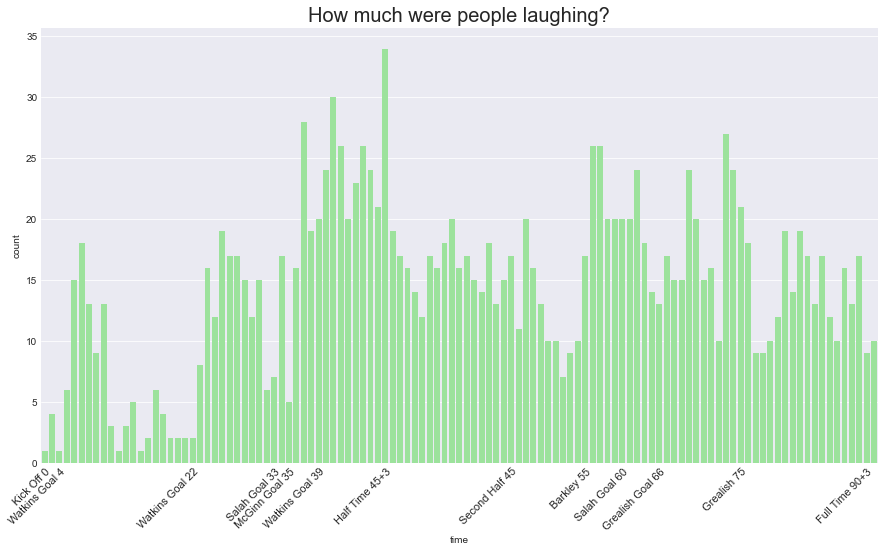

In [22]:
plt.figure(figsize=(15,8))
plt.title('How much were people laughing?',loc='center', fontsize=20)
ax = sns.countplot(x=terms[lolmask]['time'], color='lightgreen')
ax.set_xticklabels(matchlol_x_labels, rotation = 45, ha='right',fontsize=11)
plt.show()

# And there was anger

In [18]:
swearmask = (terms['datetime'] >= datetime.strptime('2020-10-04 18:15:00','%Y-%m-%d %H:%M:%S')) & (terms['datetime'] <= datetime.strptime('2020-10-04 20:09:00','%Y-%m-%d %H:%M:%S')) & ((terms['tokens'] == 'wtf') | (terms['tokens'] == 'fuck'))
swearmaskw = (terms['datetime'] >= datetime.strptime('2020-10-04 18:15:00','%Y-%m-%d %H:%M:%S')) & (terms['datetime'] <= datetime.strptime('2020-10-04 20:09:00','%Y-%m-%d %H:%M:%S')) & ((terms['tokens'] == 'wtf'))
swearmaskf = (terms['datetime'] >= datetime.strptime('2020-10-04 18:15:00','%Y-%m-%d %H:%M:%S')) & (terms['datetime'] <= datetime.strptime('2020-10-04 20:09:00','%Y-%m-%d %H:%M:%S')) & ( (terms['tokens'] == 'fuck'))

In [19]:
terms[swearmask]

,datetime,time,tokens
2315,2020-10-04 18:15:00,18:15:00,fuck
2323,2020-10-04 18:15:00,18:15:00,fuck
2549,2020-10-04 18:15:00,18:15:00,fuck
2648,2020-10-04 18:16:00,18:16:00,fuck
2675,2020-10-04 18:16:00,18:16:00,fuck
...,...,...,...
184796,2020-10-04 20:09:00,20:09:00,fuck
184899,2020-10-04 20:09:00,20:09:00,fuck
185006,2020-10-04 20:09:00,20:09:00,fuck
185046,2020-10-04 20:09:00,20:09:00,fuck


In [25]:
match_x_labels2 =['', 'Kick Off 0', '', '', '',
       'Watkins Goal 4', '', '', '', '',
       '', '', '', '', '',
       '',
       '', '', '', 'Watkins Goal 22', '',
       '', '', '', '', '',
       '', '', '', '', 'Salah Goal 33',
       '', 'McGinn Goal 35', '', '', '',
       'Watkins Goal 39', '', '', '', '',
       '', '', '', '', 'Half Time 45+3',
       '', '', '', '', '',
       '', '',
       '', '', '', '', '',
       '', 'Second Half 45', '', '', '',
       '', '', '', '', '',
       '', 'Barkley 55', '', '', '',
       '', 'Salah Goal 60', '', '', '',
       '', 'Grealish Goal 66', '', '', '',
       '', '', '', '', '',
       '', '', 'Grealish 75', '', '',
       '', '', '', '', '', '', '', '',
       '', '', '', '', '',
       '', '', '', '', 'Full Time 90+3', '', '', '', '']

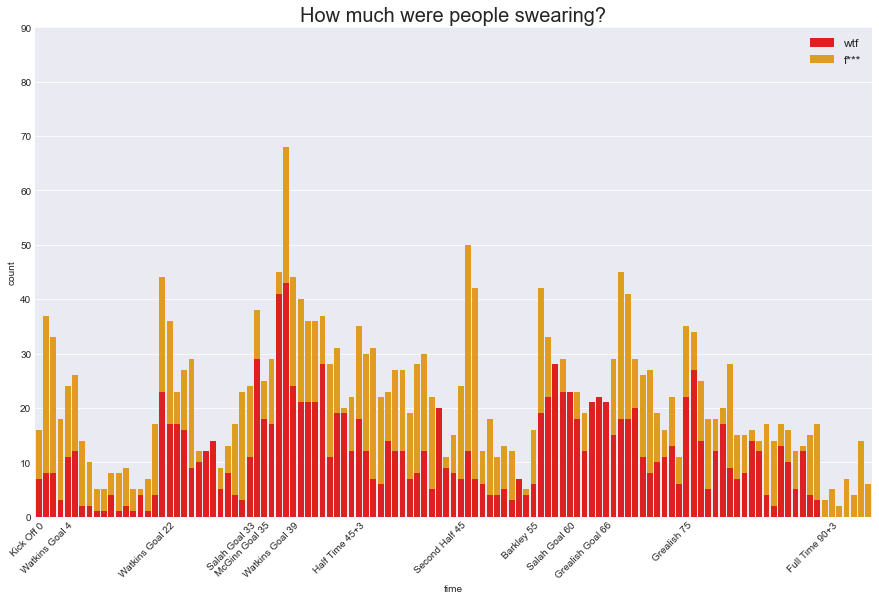

In [26]:
plt.figure(figsize=(15,9))
plt.title('How much were people swearing?',loc='center', fontsize=20)
order = terms[swearmaskw]['time'].append(terms[swearmaskf]['time']).unique()
ax = sns.countplot(x=terms[swearmaskw]['time'], order= order, zorder=2, color='red', label='wtf')
sns.countplot(x=terms[swearmaskf]['time'], color='orange', order=order, label='f***')
ax.set_xticklabels(match_x_labels2, rotation = 45, ha='right')
ax.set_ylim(0,90)
ax.legend(loc="upper right", bbox_to_anchor=(1,1),bbox_transform=ax.transAxes, prop={'size':12})
plt.show()

# Number of mentions

In [26]:
def add_mentions(text):
    mentionlist = re.findall(r'\B@\w+', text)
    if not mentionlist:
        mentionlist = np.NaN
    return mentionlist
df['mentions'] = df['text'].apply(add_mentions)

In [27]:
mentioncount = df['mentions'].explode('mentions').value_counts()[:20]

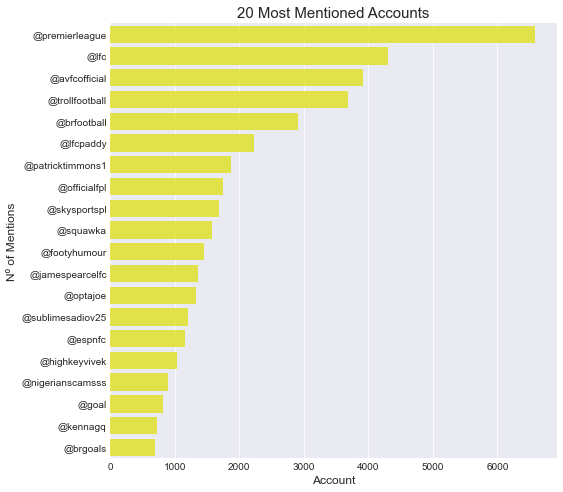

In [28]:
plt.figure(figsize=(8,8))
sns.barplot(mentioncount.values, mentioncount.index, alpha=0.8,color='yellow')
plt.title('20 Most Mentioned Accounts', fontsize=15)
plt.ylabel('Nº of Mentions', fontsize=12)
plt.xlabel('Account', fontsize=12)
plt.show()

Nigerian scams?

In [34]:
demo = df[['text', 'mentions']].explode('mentions')

In [35]:
demo.loc[demo['mentions']== '@nigerianscamsss'].text.unique()

array(['@nigerianscamsss you need to be crying about your club. don’t let liverpool’s loss change the fact your club is in bottom half of the table',
       'rt @nigerianscamsss: aston villa are giving me sustenance',
       'rt @nigerianscamsss: 5-1 aston villa.  oluwaross barkley. https://t.co/crmrigtmtv',
       'rt @nigerianscamsss: liverpool doesn’t have a red card',
       'rt @nigerianscamsss: man city took 5. man utd took 6. liverpool are taking 5. https://t.co/1no0rvqpxh',
       'rt @nigerianscamsss: liverpool told man utd you will never walk alone.',
       'rt @nigerianscamsss: nah 7 against aston villa  with 11 men on the pitch?!',
       'beat that snake😂😂😂😂 just beat it it  🎶🎶,i had just slept for like two minutes only to find 6-2 for the liverpool game what is not happening 🤣🤣🤣🤣🤣\r\n2020-10-04 19:52:23,crfmiller1,false,true,kkkkkkkkkkkkkkkkk que loucura,gol do aston villa! grealish!  aston villa 7-2 liverpool!\r\n2020-10-04 19:52:23,tobinho05,false,false,no sadio  no li

# Number of hashtags

In [36]:
def add_hashtags(text):
    hashtaglist = re.findall(r'\B(\#[a-zA-Z0-9]+\b)',text)
    if not hashtaglist:
        hashtaglist = np.NaN
    return hashtaglist
df['hashtags'] = df['text'].apply(add_hashtags)

In [37]:
df['hashtags'].explode('hashtags').value_counts().head(20)

#avlliv           25146
#lfc               7942
#avfc              5251
#liverpool         2440
#astliv            2404
#fpl               1646
#premierleague     1153
#muntot            1063
#pl                 902
#ynwa               811
#astonvilla         729
#mufc               726
#utv                578
#avllfc             552
#mantot             519
#a                  511
#epl                491
#villa              363
#manutd             331
#livestream         329
Name: hashtags, dtype: int64

In [38]:
hashtagcount = df['hashtags'].explode('hashtags').value_counts()[:20]

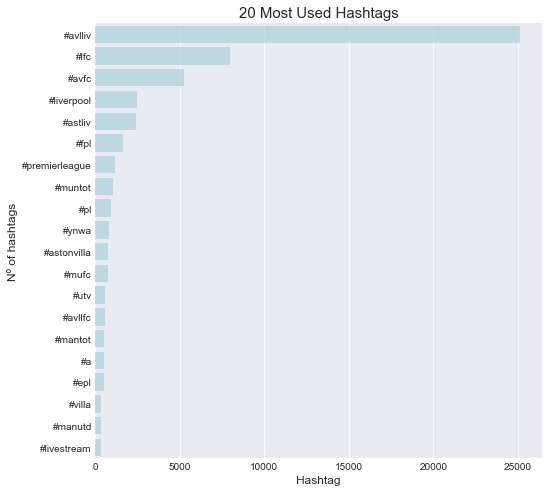

In [39]:
plt.figure(figsize=(8,8))
sns.barplot(hashtagcount.values, hashtagcount.index, alpha=0.8, color='lightblue')
plt.title('20 Most Used Hashtags', fontsize=15)
plt.ylabel('Nº of hashtags', fontsize=12)
plt.xlabel('Hashtag', fontsize=12)
plt.show()

# Average sentiment of tweets

In [40]:
df.groupby('time')['sentiment_score'].mean()

time
18:10:00    0.246791
18:11:00    0.233308
18:12:00    0.263488
18:13:00    0.162777
18:14:00    0.261291
              ...   
20:16:00    0.098029
20:17:00    0.102446
20:18:00    0.121415
20:19:00    0.129688
20:20:00    0.135914
Name: sentiment_score, Length: 131, dtype: float64

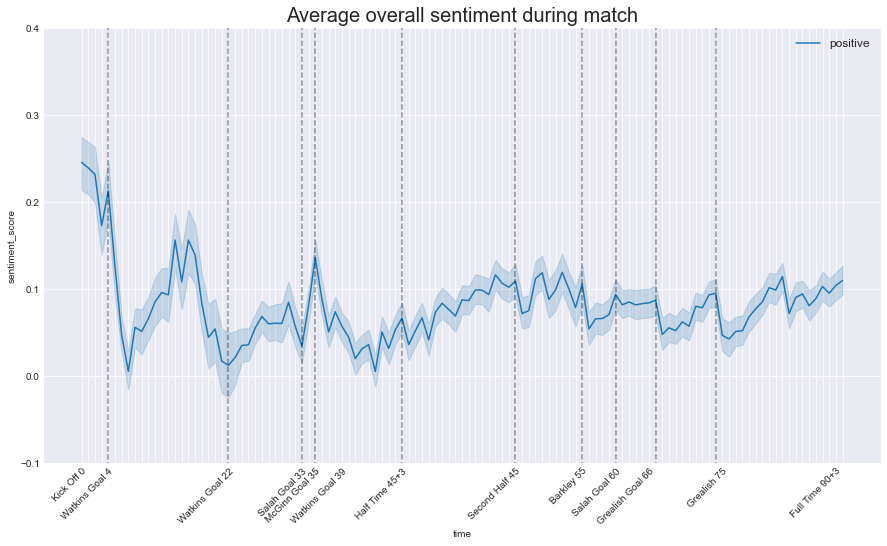

In [41]:
fig,ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=df[matchmask], x='time', y='sentiment_score', ax=ax, label='positive')
ax.set_xticklabels(match_x_labels, rotation = 45, ha='right')
plt.title('Average overall sentiment during match',loc='center', fontsize=20)
ax.plot(['18:19:00','18:19:00'], [-1,1], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['18:37:00','18:37:00'], [-1,1], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['18:48:00','18:48:00'], [-1,1], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['18:50:00','18:50:00'], [-1,1], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:03:00','19:03:00'], [-1,1], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:20:00','19:20:00'], [-1,1], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:30:00','19:30:00'], [-1,1], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:35:00','19:35:00'], [-1,1], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:41:00','19:41:00'], [-1,1], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:50:00','19:50:00'], [-1,1], linestyle='dashed', color='black', alpha=0.4)

ax.set_ylim(-0.1,0.4)
ax.get_legend().remove()
fig.legend(loc="upper right", bbox_to_anchor=(1,1),bbox_transform=ax.transAxes,prop={'size':12})
plt.show()

# Sentiment polarity of tweets

In [42]:
possen1 = df[matchmask].loc[df['sentiment_rating']=='pos'].groupby('time')['sentiment_score'].mean()
possen = df[matchmask].loc[df['sentiment_rating']=='pos']

In [43]:
negsen1 = df[matchmask].loc[df['sentiment_rating']=='neg'].groupby('time')['sentiment_score'].mean()
negsen = df[matchmask].loc[df['sentiment_rating']=='neg']

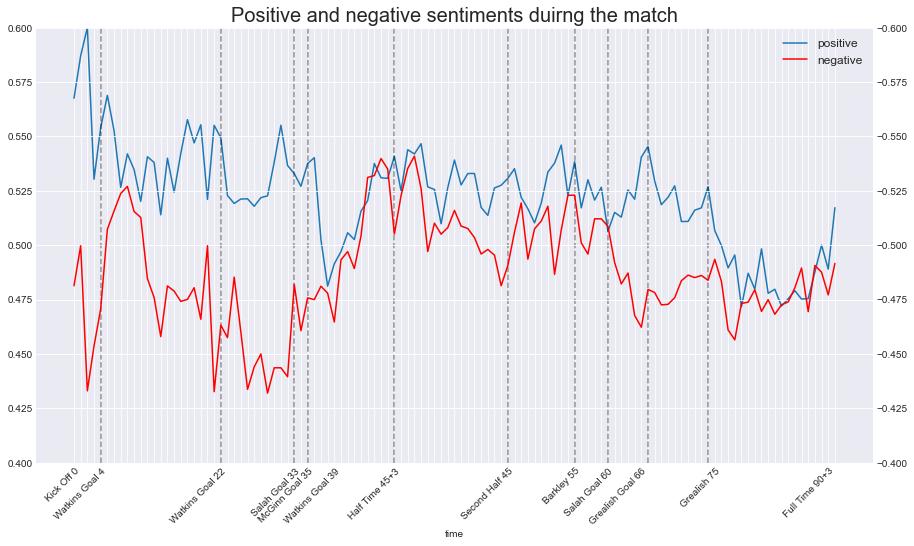

In [44]:
fig,ax = plt.subplots(figsize=(15,8))
sns.lineplot(data=possen1, x=possen1.index, y=possen1.values, ax=ax, label='positive')
ax2 = ax.twinx()
sns.lineplot(data=negsen1, x=negsen1.index, y=negsen1.values, ax=ax2, color='r', label='negative')
ax.set_xticklabels(match_x_labels, rotation = 45, ha='right')
plt.title('Positive and negative sentiments duirng the match',loc='center', fontsize=20)
ax.plot(['18:19:00','18:19:00'], [0.4,0.6], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['18:37:00','18:37:00'], [0.4,0.6], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['18:48:00','18:48:00'], [0.4,0.6], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['18:50:00','18:50:00'], [0.4,0.6], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:03:00','19:03:00'], [0.4,0.6], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:20:00','19:20:00'], [0.4,0.6], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:30:00','19:30:00'], [0.4,0.6], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:35:00','19:35:00'], [0.4,0.6], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:41:00','19:41:00'], [0.4,0.6], linestyle='dashed', color='black', alpha=0.4)
ax.plot(['19:50:00','19:50:00'], [0.4,0.6], linestyle='dashed', color='black', alpha=0.4)

ax.set_ylim(0.4,0.6)
ax2.set_ylim(-0.4,-0.6)
ax.get_legend().remove()
ax2.get_legend().remove()
fig.legend(loc="upper right", bbox_to_anchor=(1,1),bbox_transform=ax.transAxes,prop={'size':12})
plt.show()

# Sentiment polarity of tweets by dominant topic

In [45]:
facemask = (df['datetime'] >= datetime.strptime('2020-10-04 18:15:00','%Y-%m-%d %H:%M:%S')) & (df['datetime'] <= datetime.strptime('2020-10-04 20:09:00','%Y-%m-%d %H:%M:%S')) & (df['sentiment_rating'].isin(['pos','neg']))

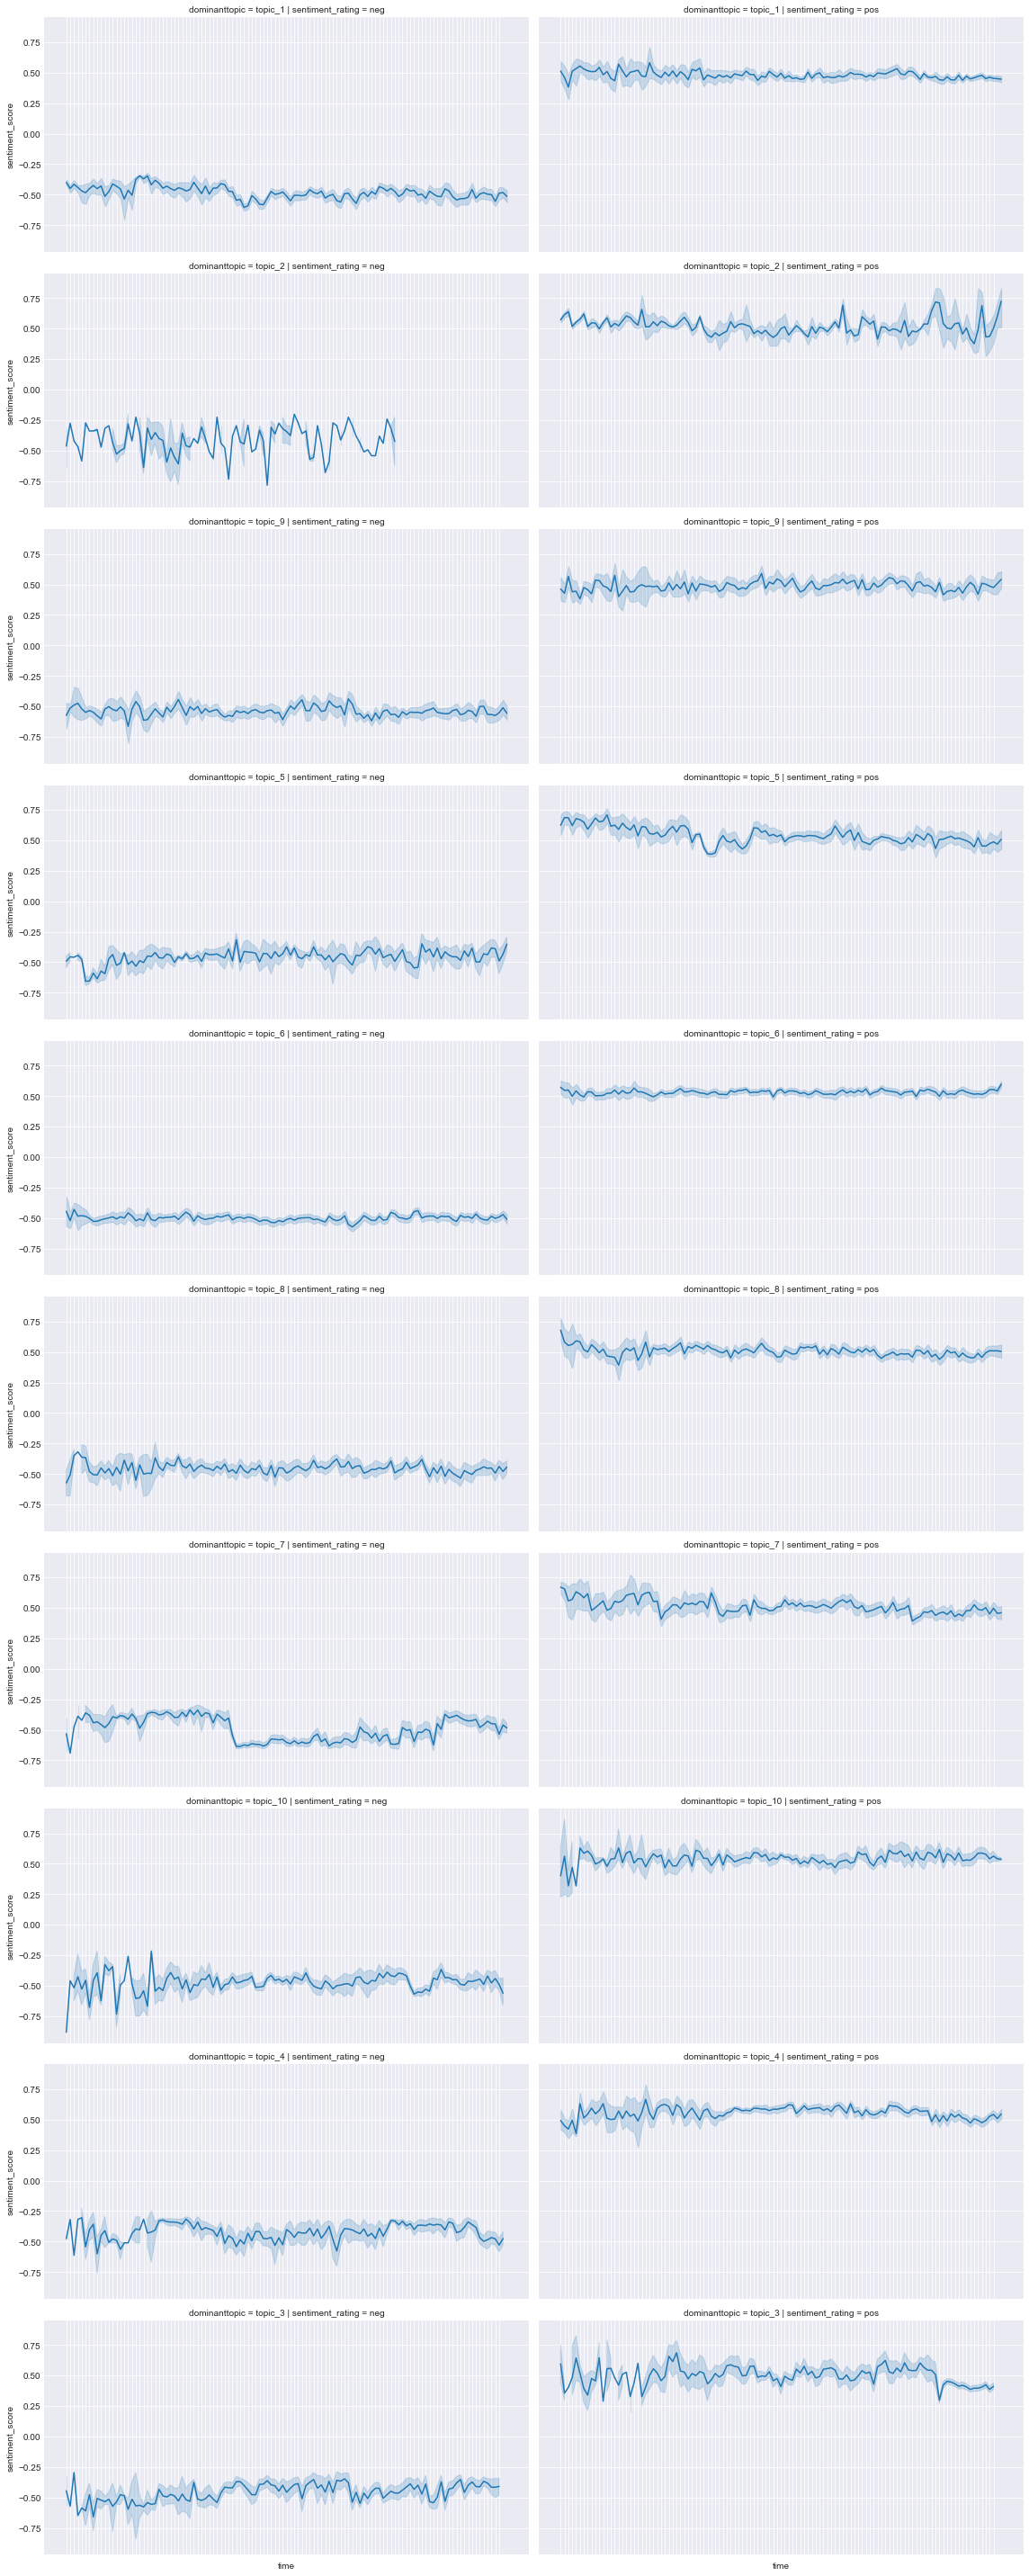

In [46]:
g = sns.FacetGrid(df[facemask], col='sentiment_rating',row='dominanttopic',height=4,aspect=2)
plt.title('How were sentiments split up by topic?',loc='center', fontsize=20)
g.map(sns.lineplot, 'time', 'sentiment_score')
g.set(xticklabels=[])
plt.show()

In [49]:
modeldf=pd.read_csv('../datasets/avlliv_topics.csv')
pd.set_option('display.max_colwidth', 100)
modeldf

,dominant topic,keywords,tweetcount,topic_percent
0,topic_1,"['username', 'man', 'united', 'concede', 'lose', 'goal', 'city', 'manchester', 'season', 'utd']",23933,0.115214
1,topic_2,"['live', 'username', 'vs', 'watch', 'stream', 'match', 'free', 'hd', 'league', 'link']",9993,0.048106
2,topic_3,"['username', 'never', 'pron', 'walk', 'alone', 'say', 'united', 'really', 'embarrass', 'tell']",11041,0.053151
3,topic_4,"['username', 'united', 'hold', 'fan', 'manchester', 'laugh', 'go', 'let', 'see', 'beer']",16221,0.078088
4,topic_5,"['username', 'goal', 'one', 'grealish', 'watkins', 'fpl', 'two', 'min', 'three', 'minute']",20527,0.098817
5,topic_6,"['username', 'pron', 'well', 'get', 'good', 'play', 'team', 'think', 'mane', 'go']",51321,0.247060
6,topic_7,"['username', 'fan', 'man', 'utd', 'football', 'make', 'big', 'watch', 'help', 'goal']",20232,0.097397
7,topic_8,"['username', 'score', 'barkley', 'win', 'watkins', 'yet', 'go', 'today', 'ollie', 'dey']",23978,0.115430
8,topic_9,"['username', 'happen', 'fucking', 'fuck', 'please', 'beat', 'go', 'need', 'liverpools', 'lol']",13308,0.064065
9,topic_10,"['username', 'first', 'half', 'league', 'score', 'goal', 'premier', 'time', 'since', 'watkins']",17173,0.082671


# Wordclouds

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from PIL import Image
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)

In [46]:
positivewords = vectorizer.fit_transform(df['text'].loc[df['sentiment_rating']=='pos'])

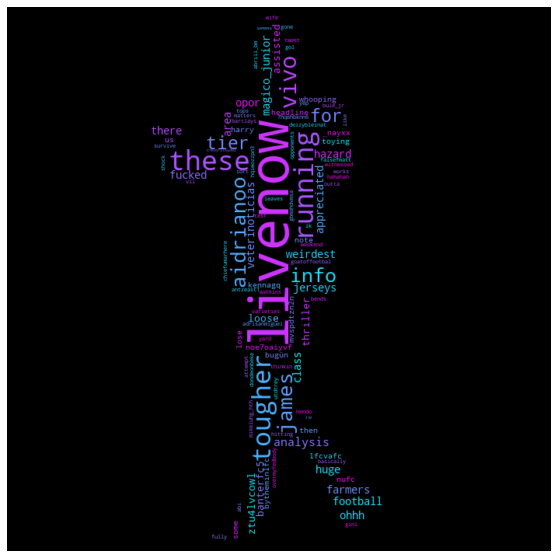

In [47]:
vocab = vectorizer.get_feature_names()
common_words = pd.DataFrame(negativewords.toarray(), columns = vocab).sum().sort_values(ascending = False)
mask = np.array(Image.open('../image/smith.png'))
                
wordcloud = WordCloud(max_font_size=70,
                      max_words=100,
                      background_color="black",
                      colormap='cool',
                      mask=mask)
    
# Call the function using the frequencies
wordcloud.generate_from_frequencies(frequencies=common_words)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [34]:
vectorizer = CountVectorizer(analyzer = "word",
                             tokenizer = None,
                             preprocessor = None,
                             stop_words = None,
                             max_features = 5000)

In [35]:
negativewords = vectorizer.fit_transform(df['text'].loc[df['sentiment_rating']=='neg'])

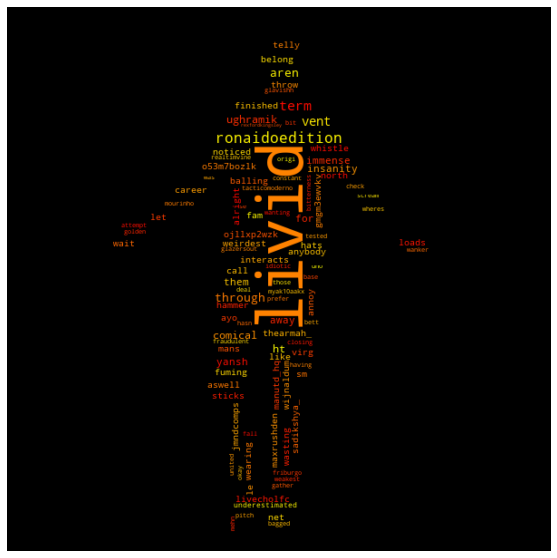

In [39]:
vocab = vectorizer.get_feature_names()
common_words = pd.DataFrame(positivewords.toarray(), columns = vocab).sum().sort_values(ascending = False)
mask = np.array(Image.open('../image/klopp.png'))
                
wordcloud = WordCloud(max_font_size=70,
                      max_words=100,
                      background_color="black",
                      colormap='autumn',
                      mask=mask)
    
# Call the function using the frequencies
wordcloud.generate_from_frequencies(frequencies=common_words)

plt.figure(figsize = (10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()